In [12]:
import seaborn as sns
import pandas as pd
import esda
from pysal.lib import weights
from splot.esda import (
    moran_scatterplot, lisa_cluster, plot_local_autocorrelation
)
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

In [4]:
uri = 'africa_data/africa.shp'

In [6]:
africa = gpd.read_file(uri)

In [7]:
africa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TYPE        54 non-null     object  
 1   NAME_LONG   54 non-null     object  
 2   ABBREV      54 non-null     object  
 3   FORMAL_EN   54 non-null     object  
 4   POP_EST     54 non-null     float64 
 5   POP_RANK    54 non-null     int64   
 6   GDP_MD_EST  54 non-null     float64 
 7   POP_YEAR    54 non-null     int64   
 8   LASTCENSUS  54 non-null     int64   
 9   GDP_YEAR    54 non-null     int64   
 10  ECONOMY     54 non-null     object  
 11  INCOME_GRP  54 non-null     object  
 12  CONTINENT   54 non-null     object  
 13  REGION_UN   54 non-null     object  
 14  SUBREGION   54 non-null     object  
 15  REGION_WB   54 non-null     object  
 16  geometry    54 non-null     geometry
dtypes: float64(2), geometry(1), int64(4), object(10)
memory usage: 7.3+ KB


In [8]:
africa = africa.set_index("NAME_LONG", drop=False)
africa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 54 entries, Ethiopia to Republic of Cabo Verde
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TYPE        54 non-null     object  
 1   NAME_LONG   54 non-null     object  
 2   ABBREV      54 non-null     object  
 3   FORMAL_EN   54 non-null     object  
 4   POP_EST     54 non-null     float64 
 5   POP_RANK    54 non-null     int64   
 6   GDP_MD_EST  54 non-null     float64 
 7   POP_YEAR    54 non-null     int64   
 8   LASTCENSUS  54 non-null     int64   
 9   GDP_YEAR    54 non-null     int64   
 10  ECONOMY     54 non-null     object  
 11  INCOME_GRP  54 non-null     object  
 12  CONTINENT   54 non-null     object  
 13  REGION_UN   54 non-null     object  
 14  SUBREGION   54 non-null     object  
 15  REGION_WB   54 non-null     object  
 16  geometry    54 non-null     geometry
dtypes: float64(2), geometry(1), int64(4), object(10)
memory usage: 7

In [16]:
africa['NAME_LONG'].unique()

array(['Ethiopia', 'South Sudan', 'Somalia', 'Kenya', 'Malawi',
       'Tanzania', 'Somaliland', 'Morocco', 'Western Sahara',
       'Republic of the Congo', 'Democratic Republic of the Congo',
       'Namibia', 'South Africa', 'Libya', 'Tunisia', 'Zambia',
       'Sierra Leone', 'Guinea', 'Liberia', 'Central African Republic',
       'Sudan', 'Djibouti', 'Eritrea', "Côte d'Ivoire", 'Mali', 'Senegal',
       'Nigeria', 'Benin', 'Angola', 'Botswana', 'Zimbabwe', 'Chad',
       'Algeria', 'Mozambique', 'eSwatini', 'Burundi', 'Rwanda', 'Uganda',
       'Lesotho', 'Cameroon', 'Gabon', 'Niger', 'Burkina Faso', 'Togo',
       'Ghana', 'Guinea-Bissau', 'Egypt', 'Mauritania',
       'Equatorial Guinea', 'The Gambia', 'Madagascar', 'Comoros',
       'São Tomé and Principe', 'Republic of Cabo Verde'], dtype=object)

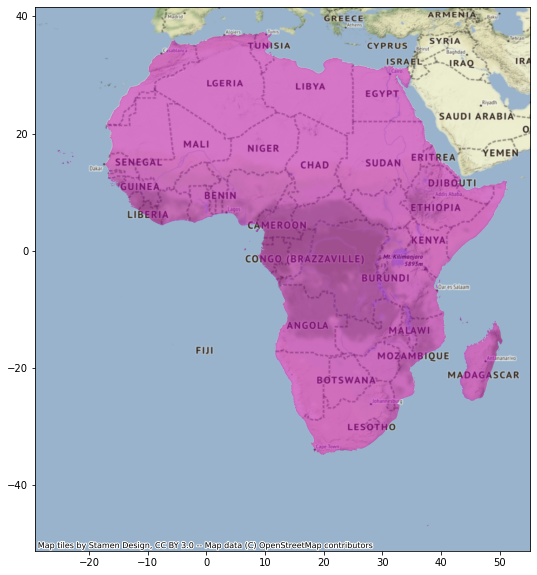

In [57]:
ax = africa.plot(alpha=0.5, color='m', figsize=(10,10))
ctx.add_basemap(ax, crs=africa.crs)

In [25]:
africa_weights = weights.Queen.from_dataframe(africa, idVariable='NAME_LONG')

C:\Users\USER\miniconda3\envs\geodata\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: Comoros, Madagascar, Republic of Cabo Verde, São Tomé and Principe.
  warnings.warn(message)


In [26]:
africa_weights['Nigeria']

{'Niger': 1.0, 'Cameroon': 1.0, 'Benin': 1.0, 'Chad': 1.0}

In [28]:
islands = africa_weights.islands

<AxesSubplot:>

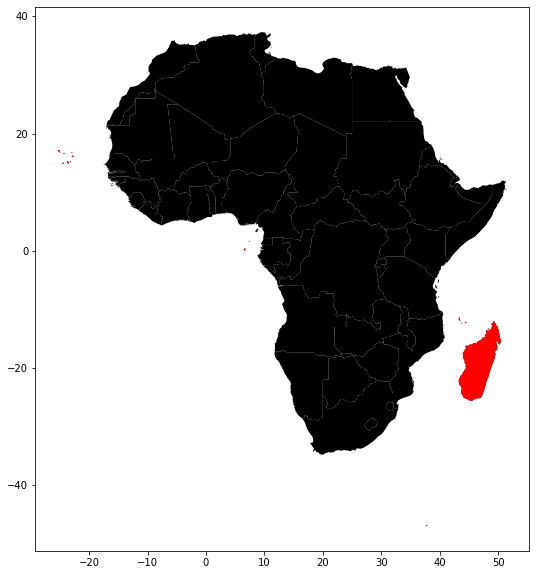

In [31]:
ax = africa.plot(color='k', figsize=(10,10))
africa.loc[islands, :].plot(color='red', ax=ax)

In [39]:
no_islands = africa.drop(africa_weights.islands)

<AxesSubplot:>

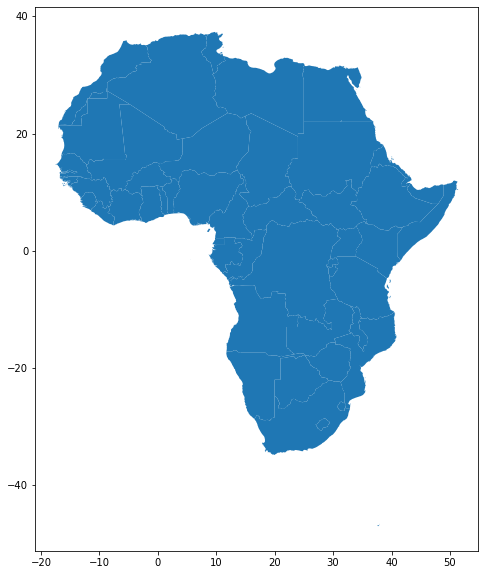

In [58]:
no_islands.plot(figsize=(10,10))

In [41]:
w = weights.Queen.from_dataframe(no_islands, idVariable='NAME_LONG')

In [42]:
w['Nigeria']

{'Niger': 1.0, 'Cameroon': 1.0, 'Benin': 1.0, 'Chad': 1.0}

In [44]:
w.transform = 'R'

In [45]:
w['Nigeria']

{'Niger': 0.25, 'Cameroon': 0.25, 'Benin': 0.25, 'Chad': 0.25}

In [46]:
w['Ghana']

{'Togo': 0.3333333333333333,
 "Côte d'Ivoire": 0.3333333333333333,
 'Burkina Faso': 0.3333333333333333}

In [48]:
no_islands['w_pop'] = weights.lag_spatial(w, no_islands['POP_EST'])

In [51]:
no_islands[['NAME_LONG', 'w_pop', 'POP_EST']].loc['Nigeria']

NAME_LONG        Nigeria
w_pop         54631691.5
POP_EST      190632261.0
Name: Nigeria, dtype: object

In [52]:
w.neighbors['Nigeria']

['Niger', 'Cameroon', 'Benin', 'Chad']

In [55]:
ng_neighbour_weights = no_islands.loc[w.neighbors['Nigeria'], 'POP_EST']
ng_neighbour_weights

NAME_LONG
Niger       19245344.0
Cameroon    24994885.0
Benin       11038805.0
Chad        12075985.0
Name: POP_EST, dtype: float64

In [56]:
ng_neighbour_weights.mean()

16838754.75